In [ ]:
import pandas as pd
d = '/content/drive/MyDrive/Dataset/Printer/printer.csv'
df = pd.read_csv(d)
print(df.head())


   layer_height  wall_thickness  infill_density infill_pattern  \
0          0.02               8              90           grid   
1          0.02               7              90      honeycomb   
2          0.02               1              80           grid   
3          0.02               4              70      honeycomb   
4          0.02               6              90           grid   

   nozzle_temperature  bed_temperature  print_speed material  fan_speed  \
0                 220               60           40      abs          0   
1                 225               65           40      abs         25   
2                 230               70           40      abs         50   
3                 240               75           40      abs         75   
4                 250               80           40      abs        100   

   roughness  tension_strenght  elongation  
0         25                18         1.2  
1         32                16         1.4  
2         40     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Display basic statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())


       layer_height  wall_thickness  infill_density  nozzle_temperature  \
count     50.000000       50.000000        50.00000           50.000000   
mean       0.106000        5.220000        53.40000          221.500000   
std        0.064397        2.922747        25.36348           14.820353   
min        0.020000        1.000000        10.00000          200.000000   
25%        0.060000        3.000000        40.00000          210.000000   
50%        0.100000        5.000000        50.00000          220.000000   
75%        0.150000        7.000000        80.00000          230.000000   
max        0.200000       10.000000        90.00000          250.000000   

       bed_temperature  print_speed   fan_speed   roughness  tension_strenght  \
count        50.000000      50.0000   50.000000   50.000000         50.000000   
mean         70.000000      64.0000   50.000000  170.580000         20.080000   
std           7.142857      29.6923   35.714286   99.034129          8.925634   


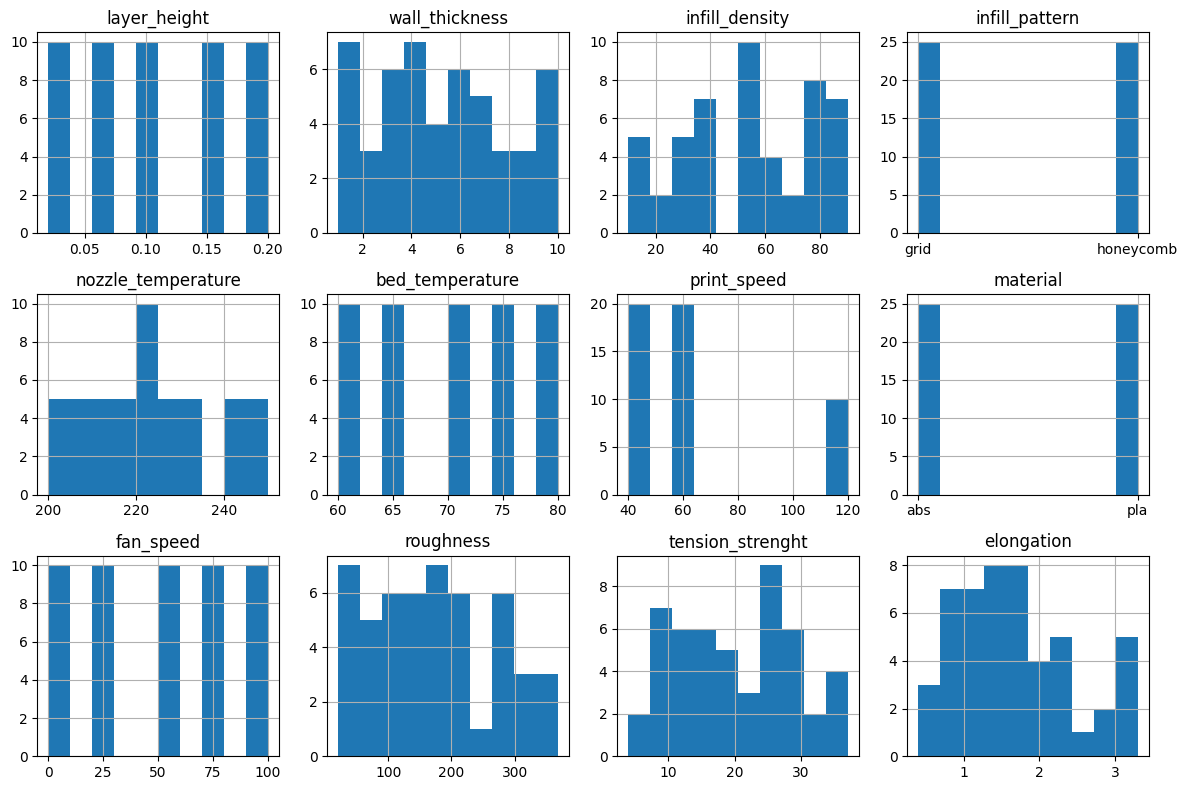

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    df[col].hist()
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [ ]:
df.layer_height = df.layer_height*100
df.elongation = df.elongation*100

In [ ]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,grid,220,60,40,abs,0,25,18,120.0
1,2.0,7,90,honeycomb,225,65,40,abs,25,32,16,140.0
2,2.0,1,80,grid,230,70,40,abs,50,40,8,80.0
3,2.0,4,70,honeycomb,240,75,40,abs,75,68,10,50.0
4,2.0,6,90,grid,250,80,40,abs,100,92,5,70.0


In [ ]:
df.material = [0 if each == "abs" else 1 for each in df.material]
# abs = 0, pla = 1

df.infill_pattern = [0 if each == "grid" else 1 for each in df.infill_pattern]
# grid = 0, honeycomb = 1

In [ ]:
y_data = df.material.values
x_data = df.drop(["material"],axis=1)

In [ ]:
absm = df[df.material == 0]
pla = df[df.material == 1]

In [ ]:
absm.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


In [ ]:
import matplotlib.pyplot as plt

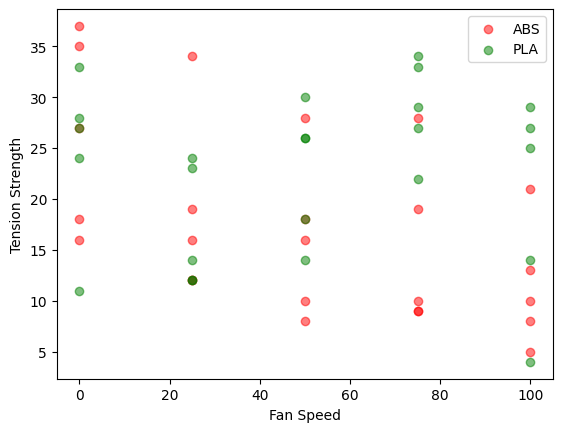

In [ ]:
plt.scatter(absm.fan_speed,absm.tension_strenght,color="red",label="ABS",alpha= 0.5)
plt.scatter(pla.fan_speed,pla.tension_strenght,color="green",label="PLA",alpha= 0.5)
plt.xlabel("Fan Speed")
plt.ylabel("Tension Strength")
plt.legend()
plt.show()

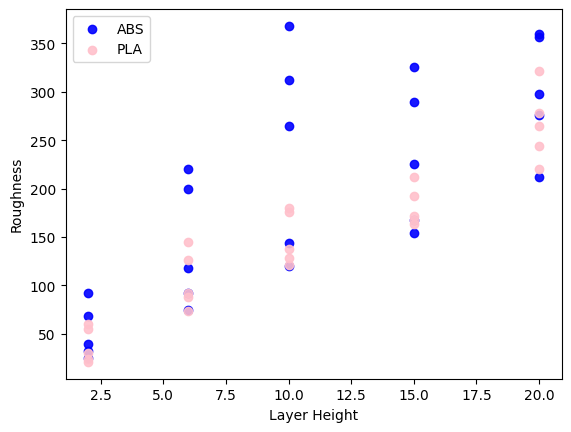

In [ ]:
plt.scatter(absm.layer_height,absm.roughness,color="blue",label="ABS",alpha= 0.9)
plt.scatter(pla.layer_height,pla.roughness,color="pink",label="PLA",alpha= 0.9)
plt.xlabel("Layer Height")
plt.ylabel("Roughness")
plt.legend()
plt.show()

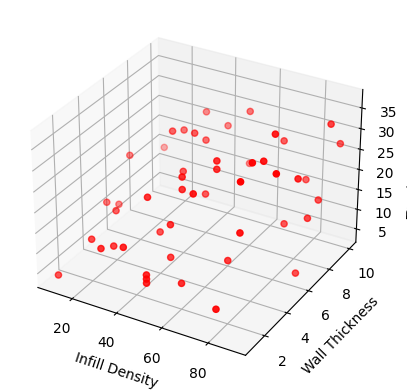

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df.infill_density
y = df.wall_thickness
z = df.tension_strenght

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Infill Density')
ax.set_ylabel('Wall Thickness')
ax.set_zlabel('Tension Strenght')

plt.show()

In [ ]:
# normalization
x_norm = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm,y_data,test_size = 0.3,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    print(" {} nn score: {} ".format(each,knn2.score(x_test,y_test)))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

NameError: name 'np' is not defined